In [2]:
#IBM HR Analytics Employee Attrition & Performance
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [63]:
# Loads the IBM HR Analytics Employee Attrition dataset
df = pd.read_csv(r"D:\مشاريع\archive\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [64]:
#Displays the first few rows 
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [65]:
#Displays the end  rows 
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [66]:
df = df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis=1)

In [67]:
#Display columns Names
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [68]:
#summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [69]:
#Shows descriptive statistics for numerical columns
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [70]:
## handle missing value
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [71]:
# Exploratory Data Analysis (EDA)
# Analyzes the target variable 'Attrition' to check unique values and class distribution
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [72]:
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [73]:
print(df.shape)

(1470, 31)


In [74]:
# - Calculates the average Age and Monthly Income grouped by Attrition status
df.groupby('Attrition')[['Age', 'MonthlyIncome']].mean()

,Age,MonthlyIncome
Attrition,,
No,37.561233,6832.739659
Yes,33.607595,4787.092827


In [75]:
df["Age"].mean()

np.float64(36.923809523809524)

In [76]:
df["MonthlyIncome"].median()

4919.0

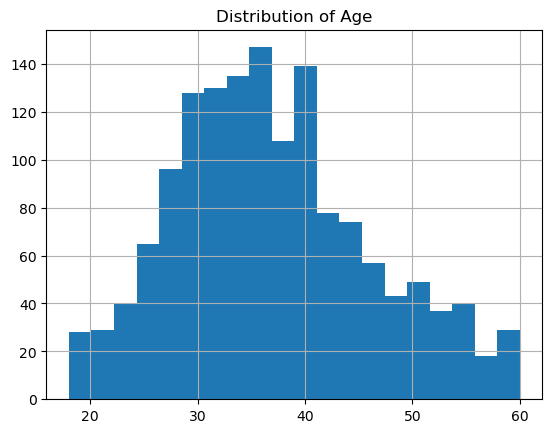

In [77]:
import matplotlib.pyplot as plt
df["Age"].hist(bins=20)
plt.title("Distribution of Age")
plt.show()

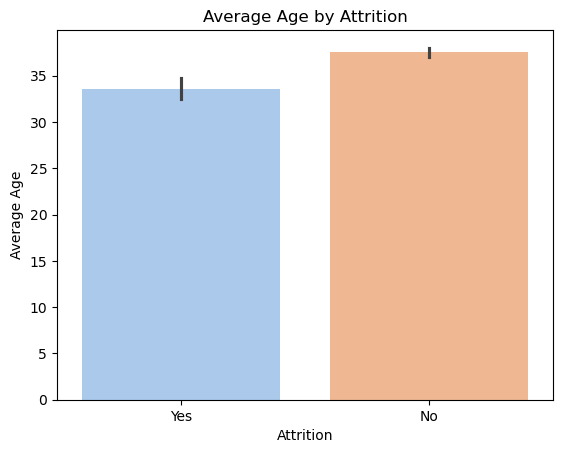

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x='Attrition', y='Age',data=df,  palette='pastel')
plt.title('Average Age by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Average Age')
plt.show()

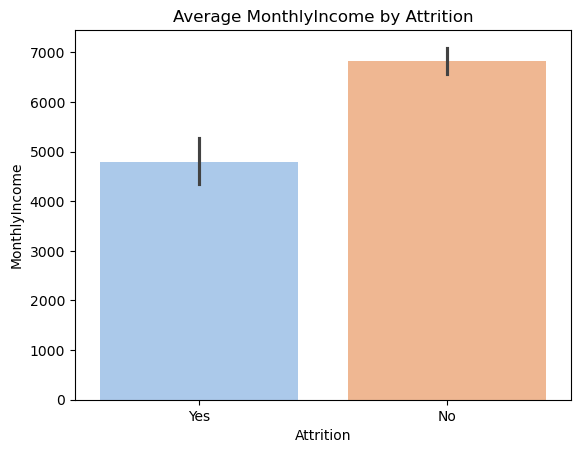

In [80]:
sns.barplot(x='Attrition', y='MonthlyIncome', data=df, palette='pastel')
plt.title('Average MonthlyIncome by Attrition')
plt.xlabel('Attrition')
plt.ylabel('MonthlyIncome')
plt.show()

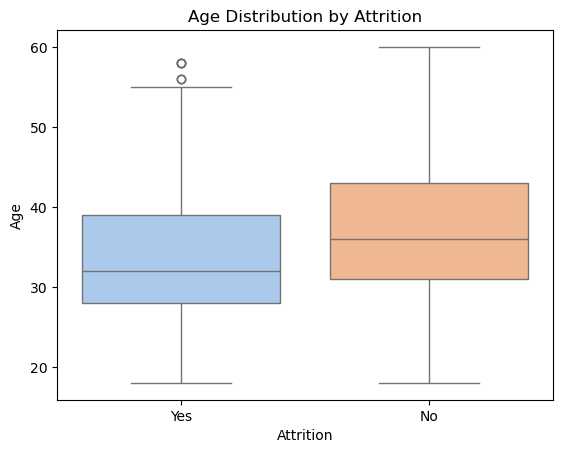

In [81]:
# Boxplot Age Distribution by Attrition
sns.boxplot(x='Attrition', y='Age', data=df ,palette= "pastel" )
plt.title('Age Distribution by Attrition')
plt.show()


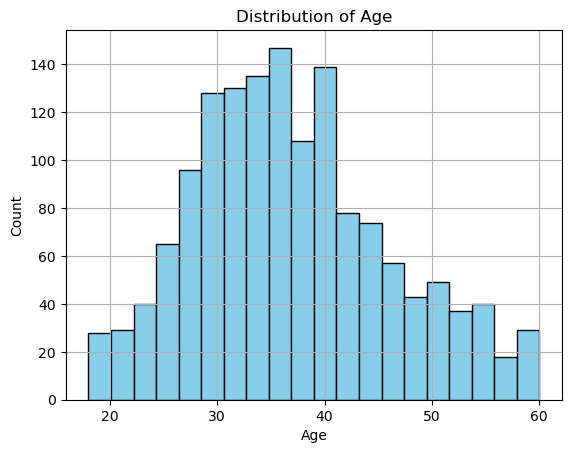

In [83]:
# Histogram Distribution of Age 
df['Age'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


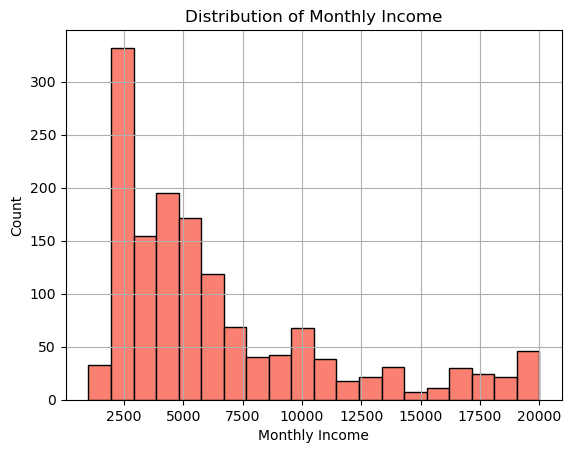

In [84]:
df['MonthlyIncome'].hist(bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.show()

In [85]:
# check Department
df['Department'].value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

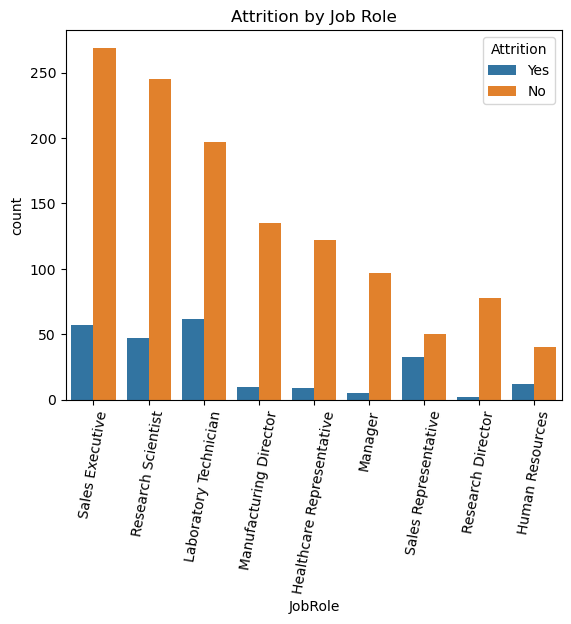

In [86]:
#  Countplot 
sns.countplot(x='JobRole', hue='Attrition', data=df)
plt.xticks(rotation=80)
plt.title('Attrition by Job Role')
plt.show()

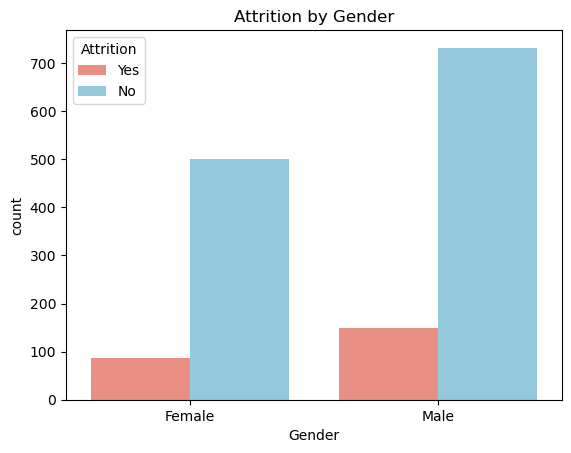

In [87]:
# Attrition by Gender
sns.countplot(x='Gender', hue='Attrition', data=df,palette={'Yes':'salmon', 'No':'skyblue'})
plt.title('Attrition by Gender')
plt.show()

In [89]:
# Attrition Rate by Department
attrition_by_dept = df.groupby('Department')['Attrition'].value_counts(normalize=True).unstack() * 100
attrition_by_dept

Attrition,No,Yes
Department,,
Human Resources,80.952381,19.047619
Research & Development,86.160250,13.839750
Sales,79.372197,20.627803


In [90]:
#Departmental Attrition Percentage
attrition_by_role = df.groupby('JobRole')['Attrition'].value_counts(normalize=True).unstack() * 100
attrition_by_role

Attrition,No,Yes
JobRole,,
Healthcare Representative,93.129771,6.870229
Human Resources,76.923077,23.076923
Laboratory Technician,76.061776,23.938224
Manager,95.098039,4.901961
Manufacturing Director,93.103448,6.896552
Research Director,97.500000,2.500000
Research Scientist,83.904110,16.095890
Sales Executive,82.515337,17.484663
Sales Representative,60.240964,39.759036


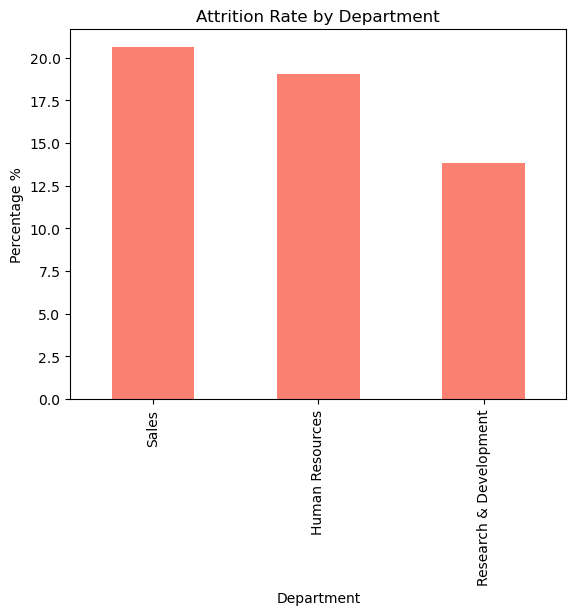

In [91]:
import matplotlib.pyplot as plt

# Plot the Attrition percentage by Department
attrition_by_dept['Yes'].sort_values(ascending=False).plot(kind='bar', color='salmon')
plt.title('Attrition Rate by Department')
plt.ylabel('Percentage %')
plt.xlabel('Department')
plt.show()

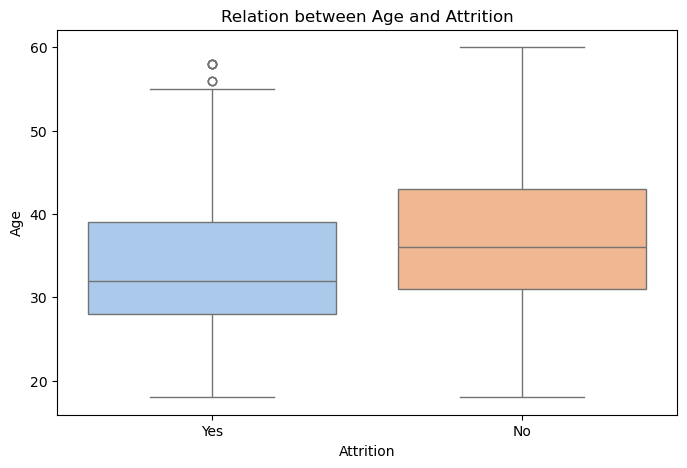

In [92]:
#Relation between Age and Attrition
plt.figure(figsize=(8,5))
sns.boxplot(x="Attrition",y="Age", data=df,palette="pastel")
plt.title("Relation between Age and Attrition")
plt.show()

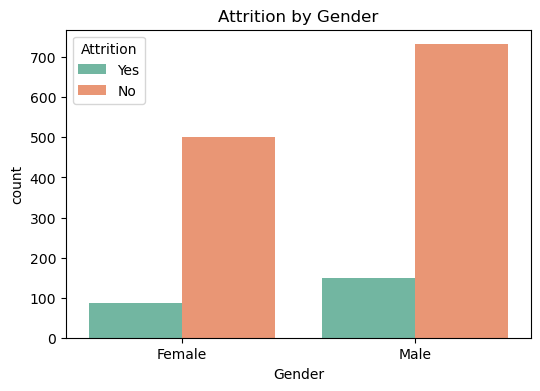

In [93]:
#Relation between Gender and Attrition
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', hue='Attrition', data=df, palette='Set2')
plt.title('Attrition by Gender')
plt.show()


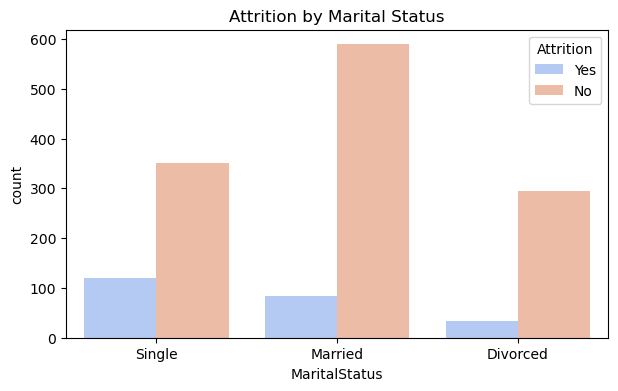

In [94]:
#Relation between Marital Status and Attrition
plt.figure(figsize=(7,4))
sns.countplot(x='MaritalStatus', hue='Attrition', data=df, palette='coolwarm')
plt.title('Attrition by Marital Status')
plt.show()


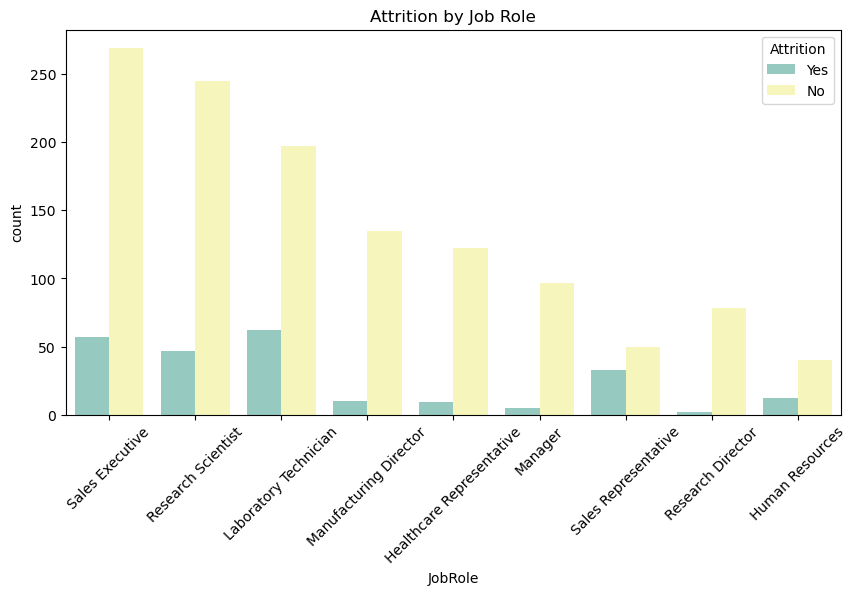

In [95]:
#Attrition by Job Role
plt.figure(figsize=(10,5))
sns.countplot(x='JobRole', hue='Attrition', data=df, palette='Set3')
plt.title('Attrition by Job Role')
plt.xticks(rotation=45)
plt.show()


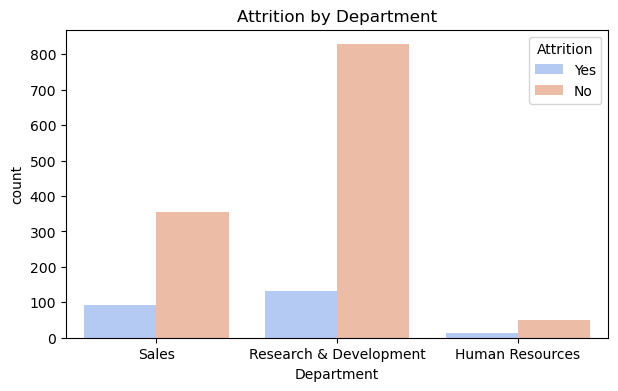

In [96]:
#Attrition by Department
plt.figure(figsize=(7,4))
sns.countplot(x='Department', hue='Attrition', data=df, palette='coolwarm')
plt.title('Attrition by Department')
plt.show()


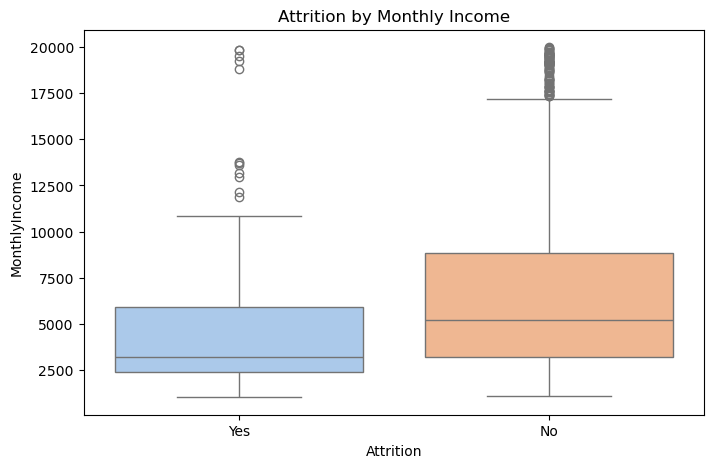

In [97]:
#Attrition by Monthly Income
plt.figure(figsize=(8,5))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, palette='pastel')
plt.title('Attrition by Monthly Income')
plt.show()


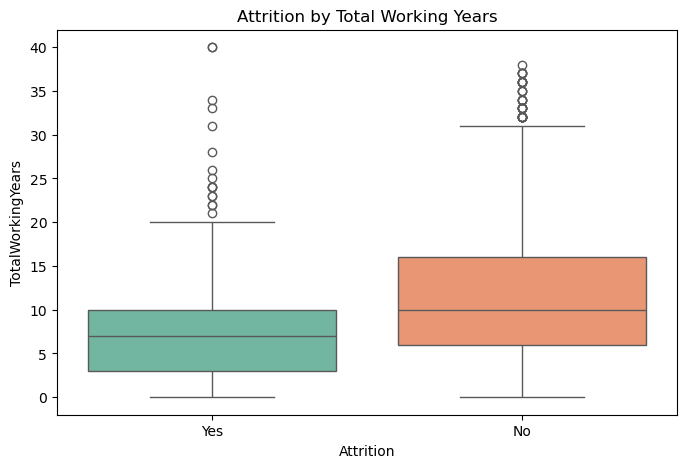

In [98]:
#Total Working Years vs Attrition
plt.figure(figsize=(8,5))
sns.boxplot(x='Attrition', y='TotalWorkingYears', data=df, palette='Set2')
plt.title('Attrition by Total Working Years')
plt.show()


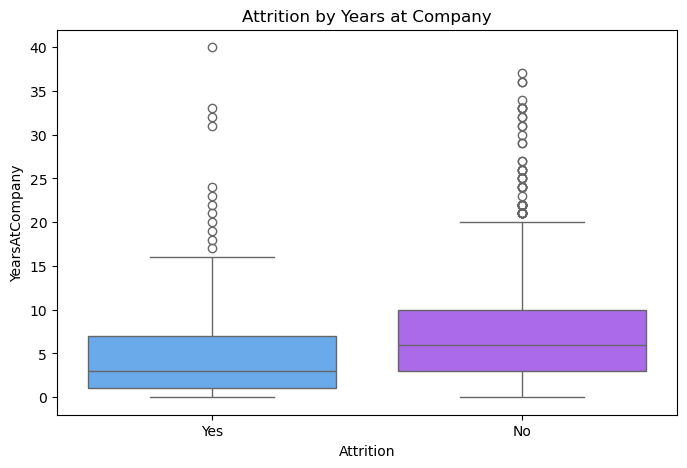

In [99]:
#Years at Company vs Attrition
plt.figure(figsize=(8,5))
sns.boxplot(x='Attrition', y='YearsAtCompany', data=df, palette='cool')
plt.title('Attrition by Years at Company')
plt.show()


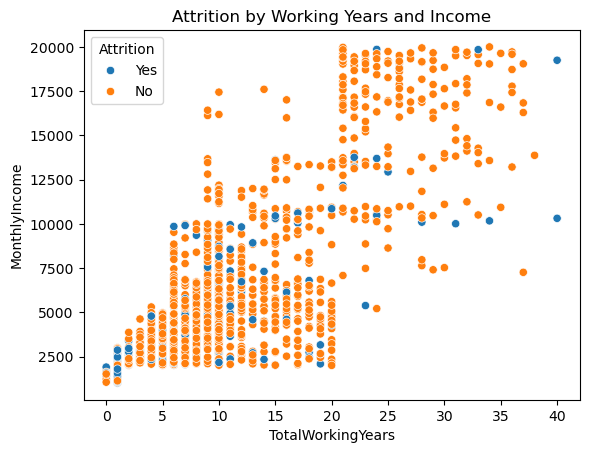

In [101]:
sns.scatterplot(x='TotalWorkingYears', y='MonthlyIncome', hue='Attrition', data=df)
plt.title('Attrition by Working Years and Income')
plt.show()


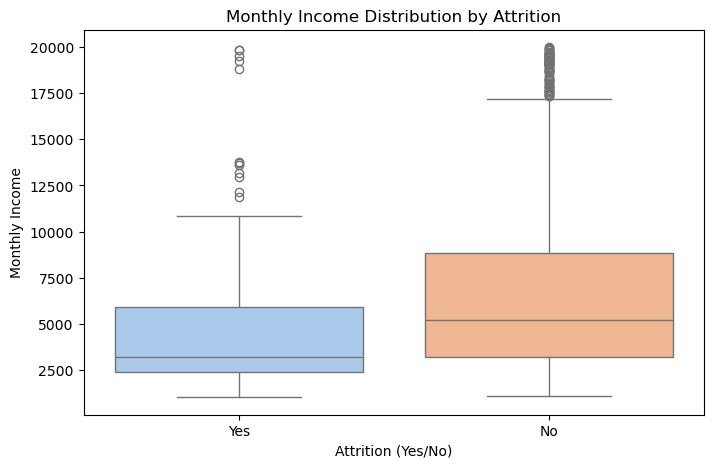

In [102]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, palette='pastel')
plt.title('Monthly Income Distribution by Attrition')
plt.ylabel('Monthly Income')
plt.xlabel('Attrition (Yes/No)')
plt.show()


In [103]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
numeric_df.head()


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2


In [106]:
corr = numeric_df.corr()
corr


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


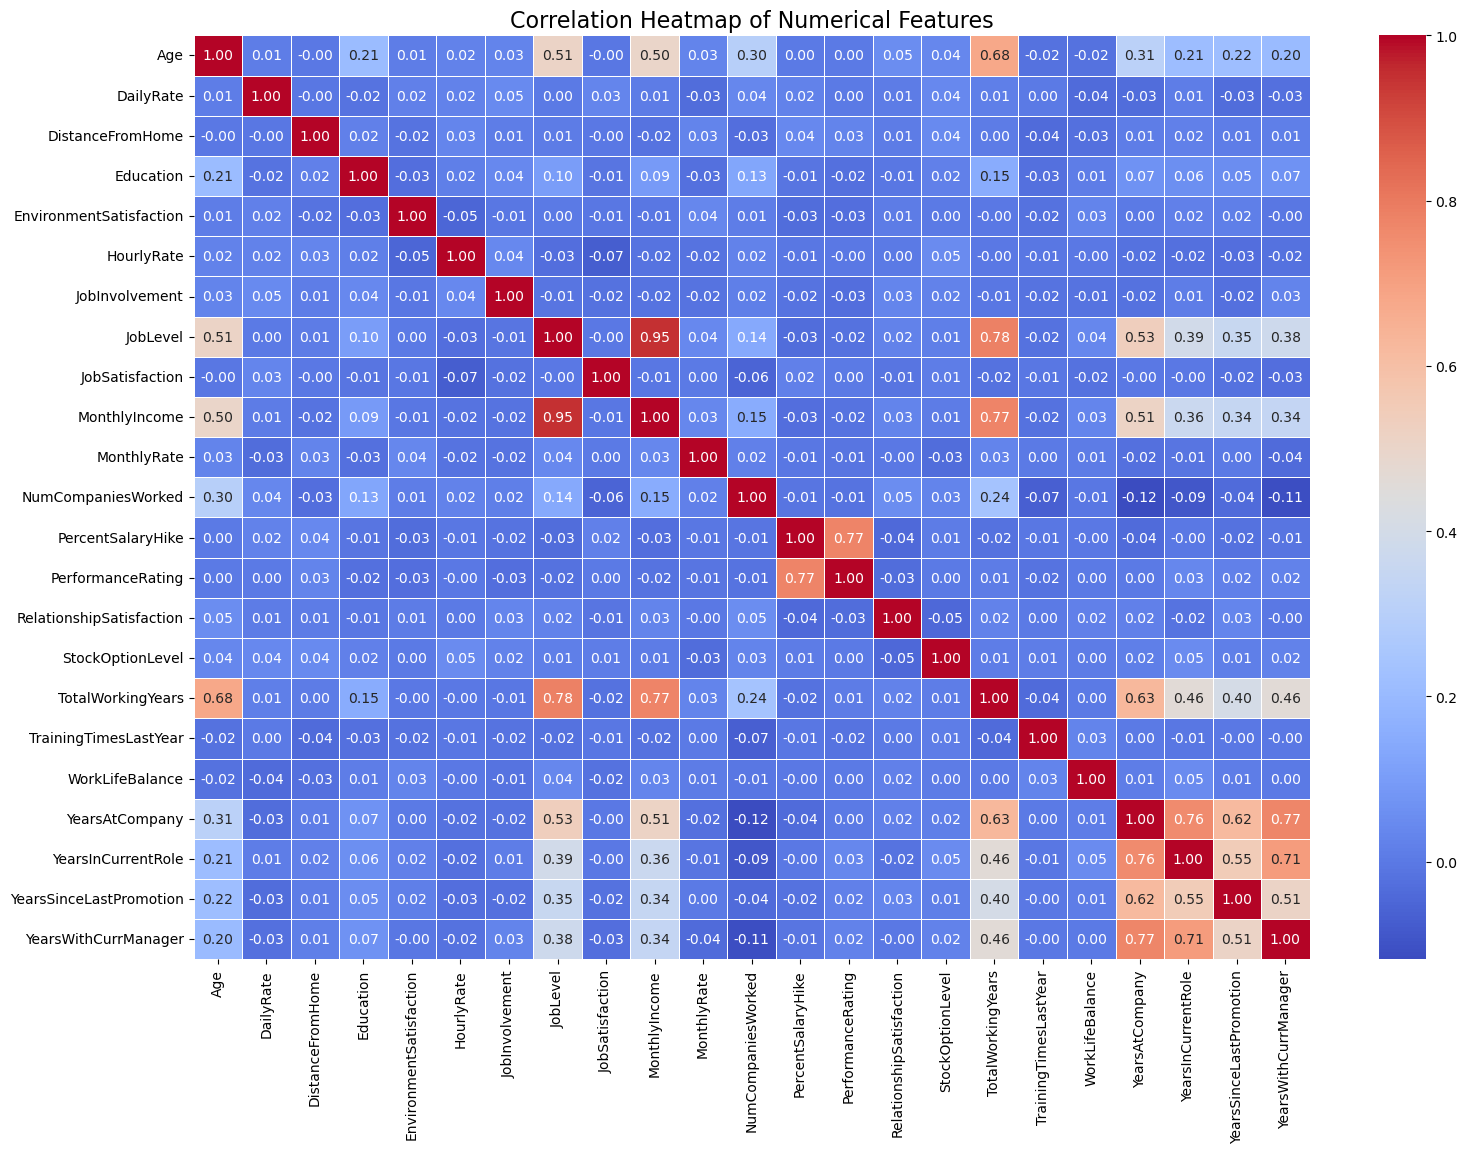

In [110]:
plt.figure(figsize=(18, 12))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.show()


In [111]:
# Data Preprocessing and Splitting
#Target Encoding
from sklearn.preprocessing import LabelEncoder

In [112]:
df_model = df.copy()

In [113]:
#  Separates Features (X) and Target (y).
X = df_model.drop('Attrition', axis=1)
y = df_model['Attrition']

In [114]:
#Encodes the 'Attrition' target variable to binary (0/1) using LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [115]:
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

In [116]:
# Applies One-Hot Encoding (pd.get_dummies) to all remaining categorical features
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [117]:
print(X_encoded.head())

   Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0   41       1102                 1          2                        2   
1   49        279                 8          1                        3   
2   37       1373                 2          2                        4   
3   33       1392                 3          4                        4   
4   27        591                 2          1                        1   

   HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  ...  \
0          94               3         2                4           5993  ...   
1          61               2         2                2           5130  ...   
2          92               2         1                3           2090  ...   
3          56               3         1                3           2909  ...   
4          40               3         1                2           3468  ...   

   JobRole_Laboratory Technician  JobRole_Manager  \
0              

In [118]:
#Train-Test Split
from sklearn.model_selection import train_test_split

In [120]:
#Splits the data into 80% Training and 20% Testing sets, using 'stratify'
X_train, X_test, y_train, y_test = train_test_split( X_encoded, y_encoded, test_size=0.2, random_state=42,stratify=y_encoded)

In [121]:
from sklearn.ensemble import RandomForestClassifier

In [122]:
# Initial Model Building and Evaluation
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

In [123]:
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [124]:
## Generates predictions (y_pred)
y_pred = model.predict(X_test)

In [125]:
## the initial model's performance on the test data
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [126]:
#(Confusion Matrix)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[242   5]
 [ 43   4]]


In [127]:
#(Classification Report)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       247
           1       0.44      0.09      0.14        47

    accuracy                           0.84       294
   macro avg       0.65      0.53      0.53       294
weighted avg       0.78      0.84      0.79       294



In [129]:
#  (Accuracy)
print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.2f}")


Accuracy: 0.84


In [130]:
#Evaluation Random Forest
y_pred = model.predict(X_test)

In [131]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       247
           1       0.44      0.09      0.14        47

    accuracy                           0.84       294
   macro avg       0.65      0.53      0.53       294
weighted avg       0.78      0.84      0.79       294



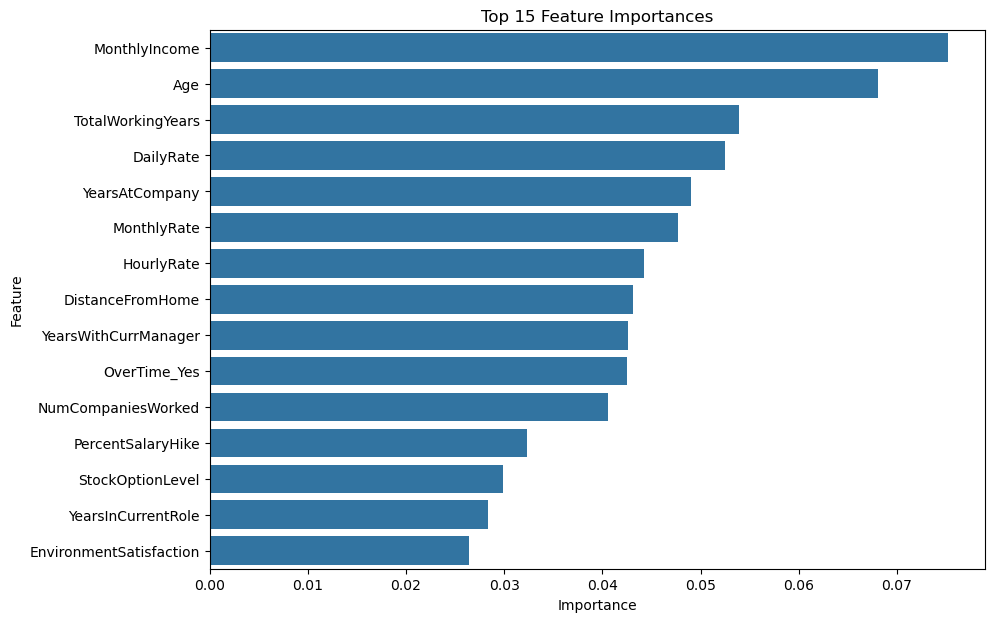

In [132]:
#Feature Importance
import matplotlib.pyplot as plt
#extract features
feature_importances = model.feature_importances_
features = X_encoded.columns
 # sort 
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(15)

# figure
plt.figure(figsize=(10, 7))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Top 15 Feature Importances')
plt.show()

In [133]:
#  Model Improvement with SMOTE
from imblearn.over_sampling import SMOTE

# Applies SMOTE only to the training set (X_train, y_train)
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"Original Attrition count: {y_train.sum()}")
print(f"SMOTE Attrition count: {y_train_smote.sum()}")

#Retrains a new Random Forest model (model_smote) on the balanced data
model_smote = RandomForestClassifier(n_estimators=100, random_state=42)
model_smote.fit(X_train_smote, y_train_smote)

# Evaluates the performance of the improved model on the original test set
y_pred_smote = model_smote.predict(X_test)
print("\nClassification Report after SMOTE:")
print(classification_report(y_test, y_pred_smote))

Original Attrition count: 190
SMOTE Attrition count: 986

Classification Report after SMOTE:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       247
           1       0.40      0.21      0.28        47

    accuracy                           0.82       294
   macro avg       0.63      0.58      0.59       294
weighted avg       0.79      0.82      0.80       294

